# Example of visualising the agent's training history performance

`WEIGHTS` : Path to the pre-trained weights
`METRICS` : Path to the training history, or None

In [1]:
WEIGHTS = './weights.pth'
METRICS = './metrics.csv'

In [2]:
import sys
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

sys.path.append("../")
from DQN import VisionDeepQ as Agent                                                        # noqa

sys.path.append("../../")
from help.visualisation.plot import graph                                                   # noqa
from help.visualisation.movie import movie                                                  # noqa

## Loading the agent and environment

In [3]:
shape = {
    "original": (1, 1, 210, 160),
    "height": slice(31, -17),
    "width": slice(7, -7),
    "max_pooling": 2,
}
network = {
    "input_channels": 4, "outputs": 4,
    "channels": [32, 64, 64],
    "kernels": [8, 4, 3],
    "padding": ["valid", "valid", "valid"],
    "strides": [4, 2, 1],
    "nodes": [128],
}
optimizer = {
    "optimizer": torch.optim.RMSprop,
    "lr": 0.0001,
    "hyperparameters": {}
}

agent = Agent(
    network=network,
    optimizer=optimizer,
    shape=shape,
    exploration_rate=0.005,
)
agent.load_state_dict(torch.load(WEIGHTS, map_location=torch.device('cpu')))

environment = gym.make('ALE/Breakout-v5', render_mode="rgb_array",
                       obs_type="grayscale", frameskip=1, repeat_action_probability=0.0)
environment.metadata["render_fps"] = 30

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


## Visualise

### Training history (if specified)

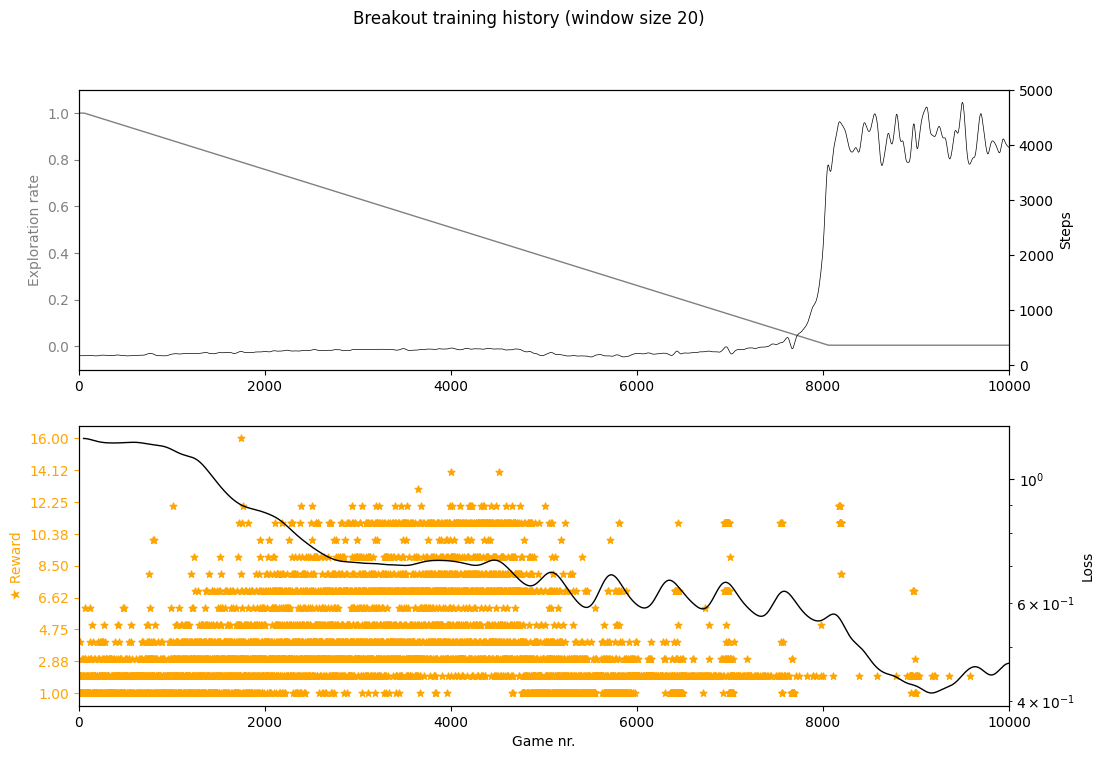

In [4]:
graph(METRICS, title="Breakout training history", window=20) if METRICS else None
plt.savefig('./metrics.png') if METRICS else None
plt.show() if METRICS else None

### In action

In [5]:
movie(environment, agent, './breakout.mp4', fps=20)